In [1]:
import pandas as pd
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize
from PIL import Image

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tkinter as tk
from PIL import Image, ImageTk
import cv2
import numpy as np
import time

In [5]:
# 이미지 불러오기
target_size = (128, 128)

images = []
for i in range(1, 6001):
    try:
        print(f'{i}.jpg')
        img = load_img(f"C:/Users/user/Desktop/kevin1/{i}.jpg", target_size=target_size)  # 이미지 크기 조정
        image_arr = img_to_array(img)
        images.append(image_arr)
    except FileNotFoundError:
        print(f"파일 {i}.jpg를 찾을 수 없습니다.")

1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg
99.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.

1076.jpg
1077.jpg
1078.jpg
1079.jpg
1080.jpg
1081.jpg
1082.jpg
1083.jpg
1084.jpg
1085.jpg
1086.jpg
1087.jpg
1088.jpg
1089.jpg
1090.jpg
1091.jpg
1092.jpg
1093.jpg
1094.jpg
1095.jpg
1096.jpg
1097.jpg
1098.jpg
1099.jpg
1100.jpg
1101.jpg
1102.jpg
1103.jpg
1104.jpg
1105.jpg
1106.jpg
1107.jpg
1108.jpg
1109.jpg
1110.jpg
1111.jpg
1112.jpg
1113.jpg
1114.jpg
1115.jpg
1116.jpg
1117.jpg
1118.jpg
1119.jpg
1120.jpg
1121.jpg
1122.jpg
1123.jpg
1124.jpg
1125.jpg
1126.jpg
1127.jpg
1128.jpg
1129.jpg
1130.jpg
1131.jpg
1132.jpg
1133.jpg
1134.jpg
1135.jpg
1136.jpg
1137.jpg
1138.jpg
1139.jpg
1140.jpg
1141.jpg
1142.jpg
1143.jpg
1144.jpg
1145.jpg
1146.jpg
1147.jpg
1148.jpg
1149.jpg
1150.jpg
1151.jpg
1152.jpg
1153.jpg
1154.jpg
1155.jpg
1156.jpg
1157.jpg
1158.jpg
1159.jpg
1160.jpg
1161.jpg
1162.jpg
1163.jpg
1164.jpg
1165.jpg
1166.jpg
1167.jpg
1168.jpg
1169.jpg
1170.jpg
1171.jpg
1172.jpg
1173.jpg
1174.jpg
1175.jpg
1176.jpg
1177.jpg
1178.jpg
1179.jpg
1180.jpg
1181.jpg
1182.jpg
1183.jpg
1184.jpg
1185.jpg
1186.jpg
1

2000.jpg
2001.jpg
2002.jpg
2003.jpg
2004.jpg
2005.jpg
2006.jpg
2007.jpg
2008.jpg
2009.jpg
2010.jpg
2011.jpg
2012.jpg
2013.jpg
2014.jpg
2015.jpg
2016.jpg
2017.jpg
2018.jpg
2019.jpg
2020.jpg
2021.jpg
2022.jpg
2023.jpg
2024.jpg
2025.jpg
2026.jpg
2027.jpg
2028.jpg
2029.jpg
2030.jpg
2031.jpg
2032.jpg
2033.jpg
2034.jpg
2035.jpg
2036.jpg
2037.jpg
2038.jpg
2039.jpg
2040.jpg
2041.jpg
2042.jpg
2043.jpg
2044.jpg
2045.jpg
2046.jpg
2047.jpg
2048.jpg
2049.jpg
2050.jpg
2051.jpg
2052.jpg
2053.jpg
2054.jpg
2055.jpg
2056.jpg
2057.jpg
2058.jpg
2059.jpg
2060.jpg
2061.jpg
2062.jpg
2063.jpg
2064.jpg
2065.jpg
2066.jpg
2067.jpg
2068.jpg
2069.jpg
2070.jpg
2071.jpg
2072.jpg
2073.jpg
2074.jpg
2075.jpg
2076.jpg
2077.jpg
2078.jpg
2079.jpg
2080.jpg
2081.jpg
2082.jpg
2083.jpg
2084.jpg
2085.jpg
2086.jpg
2087.jpg
2088.jpg
2089.jpg
2090.jpg
2091.jpg
2092.jpg
2093.jpg
2094.jpg
2095.jpg
2096.jpg
2097.jpg
2098.jpg
2099.jpg
2100.jpg
2101.jpg
2102.jpg
2103.jpg
2104.jpg
2105.jpg
2106.jpg
2107.jpg
2108.jpg
2109.jpg
2110.jpg
2

2998.jpg
2999.jpg
3000.jpg
3001.jpg
3002.jpg
3003.jpg
3004.jpg
3005.jpg
3006.jpg
3007.jpg
3008.jpg
3009.jpg
3010.jpg
3011.jpg
3012.jpg
3013.jpg
3014.jpg
3015.jpg
3016.jpg
3017.jpg
3018.jpg
3019.jpg
3020.jpg
3021.jpg
3022.jpg
3023.jpg
3024.jpg
3025.jpg
3026.jpg
3027.jpg
3028.jpg
3029.jpg
3030.jpg
3031.jpg
3032.jpg
3033.jpg
3034.jpg
3035.jpg
3036.jpg
3037.jpg
3038.jpg
3039.jpg
3040.jpg
3041.jpg
3042.jpg
3043.jpg
3044.jpg
3045.jpg
3046.jpg
3047.jpg
3048.jpg
3049.jpg
3050.jpg
3051.jpg
3052.jpg
3053.jpg
3054.jpg
3055.jpg
3056.jpg
3057.jpg
3058.jpg
3059.jpg
3060.jpg
3061.jpg
3062.jpg
3063.jpg
3064.jpg
3065.jpg
3066.jpg
3067.jpg
3068.jpg
3069.jpg
3070.jpg
3071.jpg
3072.jpg
3073.jpg
3074.jpg
3075.jpg
3076.jpg
3077.jpg
3078.jpg
3079.jpg
3080.jpg
3081.jpg
3082.jpg
3083.jpg
3084.jpg
3085.jpg
3086.jpg
3087.jpg
3088.jpg
3089.jpg
3090.jpg
3091.jpg
3092.jpg
3093.jpg
3094.jpg
3095.jpg
3096.jpg
3097.jpg
3098.jpg
3099.jpg
3100.jpg
3101.jpg
3102.jpg
3103.jpg
3104.jpg
3105.jpg
3106.jpg
3107.jpg
3108.jpg
3

3910.jpg
3911.jpg
3912.jpg
3913.jpg
3914.jpg
3915.jpg
3916.jpg
3917.jpg
3918.jpg
3919.jpg
3920.jpg
3921.jpg
3922.jpg
3923.jpg
3924.jpg
3925.jpg
3926.jpg
3927.jpg
3928.jpg
3929.jpg
3930.jpg
3931.jpg
3932.jpg
3933.jpg
3934.jpg
3935.jpg
3936.jpg
3937.jpg
3938.jpg
3939.jpg
3940.jpg
3941.jpg
3942.jpg
3943.jpg
3944.jpg
3945.jpg
3946.jpg
3947.jpg
3948.jpg
3949.jpg
3950.jpg
3951.jpg
3952.jpg
3953.jpg
3954.jpg
3955.jpg
3956.jpg
3957.jpg
3958.jpg
3959.jpg
3960.jpg
3961.jpg
3962.jpg
3963.jpg
3964.jpg
3965.jpg
3966.jpg
3967.jpg
3968.jpg
3969.jpg
3970.jpg
3971.jpg
3972.jpg
3973.jpg
3974.jpg
3975.jpg
3976.jpg
3977.jpg
3978.jpg
3979.jpg
3980.jpg
3981.jpg
3982.jpg
3983.jpg
3984.jpg
3985.jpg
3986.jpg
3987.jpg
3988.jpg
3989.jpg
3990.jpg
3991.jpg
3992.jpg
3993.jpg
3994.jpg
3995.jpg
3996.jpg
3997.jpg
3998.jpg
3999.jpg
4000.jpg
4001.jpg
4002.jpg
4003.jpg
4004.jpg
4005.jpg
4006.jpg
4007.jpg
4008.jpg
4009.jpg
4010.jpg
4011.jpg
4012.jpg
4013.jpg
4014.jpg
4015.jpg
4016.jpg
4017.jpg
4018.jpg
4019.jpg
4020.jpg
4

4842.jpg
4843.jpg
4844.jpg
4845.jpg
4846.jpg
4847.jpg
4848.jpg
4849.jpg
4850.jpg
4851.jpg
4852.jpg
4853.jpg
4854.jpg
4855.jpg
4856.jpg
4857.jpg
4858.jpg
4859.jpg
4860.jpg
4861.jpg
4862.jpg
4863.jpg
4864.jpg
4865.jpg
4866.jpg
4867.jpg
4868.jpg
4869.jpg
4870.jpg
4871.jpg
4872.jpg
4873.jpg
4874.jpg
4875.jpg
4876.jpg
4877.jpg
4878.jpg
4879.jpg
4880.jpg
4881.jpg
4882.jpg
4883.jpg
4884.jpg
4885.jpg
4886.jpg
4887.jpg
4888.jpg
4889.jpg
4890.jpg
4891.jpg
4892.jpg
4893.jpg
4894.jpg
4895.jpg
4896.jpg
4897.jpg
4898.jpg
4899.jpg
4900.jpg
4901.jpg
4902.jpg
4903.jpg
4904.jpg
4905.jpg
4906.jpg
4907.jpg
4908.jpg
4909.jpg
4910.jpg
4911.jpg
4912.jpg
4913.jpg
4914.jpg
4915.jpg
4916.jpg
4917.jpg
4918.jpg
4919.jpg
4920.jpg
4921.jpg
4922.jpg
4923.jpg
4924.jpg
4925.jpg
4926.jpg
4927.jpg
4928.jpg
4929.jpg
4930.jpg
4931.jpg
4932.jpg
4933.jpg
4934.jpg
4935.jpg
4936.jpg
4937.jpg
4938.jpg
4939.jpg
4940.jpg
4941.jpg
4942.jpg
4943.jpg
4944.jpg
4945.jpg
4946.jpg
4947.jpg
4948.jpg
4949.jpg
4950.jpg
4951.jpg
4952.jpg
4

5808.jpg
5809.jpg
5810.jpg
5811.jpg
5812.jpg
5813.jpg
5814.jpg
5815.jpg
5816.jpg
5817.jpg
5818.jpg
5819.jpg
5820.jpg
5821.jpg
5822.jpg
5823.jpg
5824.jpg
5825.jpg
5826.jpg
5827.jpg
5828.jpg
5829.jpg
5830.jpg
5831.jpg
5832.jpg
5833.jpg
5834.jpg
5835.jpg
5836.jpg
5837.jpg
5838.jpg
5839.jpg
5840.jpg
5841.jpg
5842.jpg
5843.jpg
5844.jpg
5845.jpg
5846.jpg
5847.jpg
5848.jpg
5849.jpg
5850.jpg
5851.jpg
5852.jpg
5853.jpg
5854.jpg
5855.jpg
5856.jpg
5857.jpg
5858.jpg
5859.jpg
5860.jpg
5861.jpg
5862.jpg
5863.jpg
5864.jpg
5865.jpg
5866.jpg
5867.jpg
5868.jpg
5869.jpg
5870.jpg
5871.jpg
5872.jpg
5873.jpg
5874.jpg
5875.jpg
5876.jpg
5877.jpg
5878.jpg
5879.jpg
5880.jpg
5881.jpg
5882.jpg
5883.jpg
5884.jpg
5885.jpg
5886.jpg
5887.jpg
5888.jpg
5889.jpg
5890.jpg
5891.jpg
5892.jpg
5893.jpg
5894.jpg
5895.jpg
5896.jpg
5897.jpg
5898.jpg
5899.jpg
5900.jpg
5901.jpg
5902.jpg
5903.jpg
5904.jpg
5905.jpg
5906.jpg
5907.jpg
5908.jpg
5909.jpg
5910.jpg
5911.jpg
5912.jpg
5913.jpg
5914.jpg
5915.jpg
5916.jpg
5917.jpg
5918.jpg
5

In [6]:
# 이후에 np.array 변환과 정규화 수행
images = np.array(images) / 255.0

In [7]:
images.shape

(6000, 128, 128, 3)

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow_addons as tfa
import math

C:\Users\user\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [9]:
import tensorflow as tf
import math
import tensorflow_addons as tfa

augmented_images = []

for image in images:
    # 1.Original Image
    augmented_images.append(image)

    # 2.Random Rotation within ±30 degrees
    rotation_degree = tf.random.uniform([], minval=-30, maxval=30, dtype=tf.float32)
    rotation_radian = rotation_degree * math.pi / 180
    rotated_tensor = tfa.image.rotate(image, rotation_radian)
    augmented_images.append(rotated_tensor.numpy())

    # 3.Random Brightness Adjustment
    brightness_tensor = tf.image.random_brightness(image, max_delta=0.5)
    augmented_images.append(brightness_tensor.numpy())

    # 4.Random Contrast Adjustment
    contrast_tensor = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    augmented_images.append(contrast_tensor.numpy())

    # 5.Random Saturation Adjustment
    saturation_tensor = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    augmented_images.append(saturation_tensor.numpy())

    # 6.Random Zoom
    zoom_tensor = tf.keras.preprocessing.image.random_zoom(image, zoom_range=(0.8, 1.2), row_axis=0, col_axis=1, channel_axis=2)
    augmented_images.append(zoom_tensor)

    # 7.Random Shear
    shear_tensor = tf.keras.preprocessing.image.random_shear(image, intensity=0.2, row_axis=0, col_axis=1, channel_axis=2)
    augmented_images.append(shear_tensor)

    # 8.Random Width Shift
    width_shift_tensor = tf.keras.preprocessing.image.random_shift(image, wrg=0.2, hrg=0, row_axis=0, col_axis=1, channel_axis=2)
    augmented_images.append(width_shift_tensor)

    # 9.Random Height Shift
    height_shift_tensor = tf.keras.preprocessing.image.random_shift(image, wrg=0, hrg=0.2, row_axis=0, col_axis=1, channel_axis=2)
    augmented_images.append(height_shift_tensor)

# Now, augmented_images list contains 5 original transformations plus 4 new transformations for each image.


In [10]:
len(augmented_images)

54000

In [13]:
original_labels = np.repeat(np.array([0,1,2]), 2000) 
labels = np.repeat(original_labels, 9)

In [14]:
len(labels)

54000

In [15]:
train_x, val_x, train_y, val_y = train_test_split(
    images, original_labels, test_size=0.2, shuffle=True, random_state=42,stratify=original_labels)

In [16]:
# 타겟 데이터 정규화
num_classes=3

train_y = to_categorical(train_y, num_classes=num_classes)  # 원-핫 인코딩
val_y = to_categorical(val_y, num_classes=num_classes)

In [17]:
import numpy as np

train_x = np.array(train_x)
train_y = np.array(train_y)
val_x = np.array(val_x)
val_y = np.array(val_y)

print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)
print("val_x shape:", val_x.shape)
print("val_y shape:", val_y.shape)

train_x shape: (4800, 128, 128, 3)
train_y shape: (4800, 3)
val_x shape: (1200, 128, 128, 3)
val_y shape: (1200, 3)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
# 신경망 축소

In [4]:
num_classes = 3
model = Sequential()

# 첫 번째 컨볼루션 블록
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
#model.add(LeakyReLU(alpha=0.1))
#model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# # 두 번째 컨볼루션 블록
# model.add(Conv2D(64, (3, 3)))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# # 세 번째 컨볼루션 블록
# model.add(Conv2D(128, (3, 3)))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))

# 플래튼 및 완전 연결 레이어
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

# Early Stopping, Model Checkpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('cnn_model.h5', save_best_only=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 flatten (Flatten)           (None, 508032)            0         
                                                                 
 dense (Dense)               (None, 128)               65028224  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
#신경망 확대

In [6]:
num_classes = 3
model = Sequential()

# 첫 번째 컨볼루션 블록
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

 # 두 번째 컨볼루션 블록
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# # 세 번째 컨볼루션 블록
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 플래튼 및 완전 연결 레이어
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Early Stopping, Model Checkpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('cnn_model.h5', save_best_only=False)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)       

In [ ]:
#gpt4이용 새로운 코드 작성

In [8]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

num_classes = 3
model = Sequential()

# 첫 번째 컨볼루션 블록 cnn 
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 두 번째 컨볼루션 블록
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 세 번째 컨볼루션 블록
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 플래튼 및 완전 연결 레이어
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 증강
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early Stopping, Model Checkpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('cnn_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# 모델 훈련 코드는 데이터셋 구조에 따


In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [78]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_x, 
    train_y, 
    validation_data=(val_x, val_y),
    epochs=100,
    batch_size=64 ,  
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
75/75 [==============================] - 98s 1s/step - loss: 0.7633 - accuracy: 0.6946 - val_loss: 1.9140 - val_accuracy: 0.4725
Epoch 2/100
75/75 [==============================] - 95s 1s/step - loss: 0.5056 - accuracy: 0.7798 - val_loss: 3.3083 - val_accuracy: 0.3925
Epoch 3/100
75/75 [==============================] - 95s 1s/step - loss: 0.4359 - accuracy: 0.8096 - val_loss: 3.8474 - val_accuracy: 0.5000
Epoch 4/100
75/75 [==============================] - 95s 1s/step - loss: 0.3962 - accuracy: 0.8306 - val_loss: 3.7471 - val_accuracy: 0.5175
Epoch 5/100
75/75 [==============================] - 99s 1s/step - loss: 0.3448 - accuracy: 0.8517 - val_loss: 3.0236 - val_accuracy: 0.5267
Epoch 6/100
75/75 [==============================] - 103s 1s/step - loss: 0.3071 - accuracy: 0.8683 - val_loss: 1.6496 - val_accuracy: 0.5800
Epoch 7/100
75/75 [==============================] - 99s 1s/step - loss: 0.2695 - accuracy: 0.8888 - val_loss: 0.9364 - val_accuracy: 0.6958
Epoch 8/100


In [79]:
# 모델의 저장 
model.save('my_cnn_model2.h5')

In [80]:
# 모델 불러오기
from keras.models import load_model
model = load_model('my_cnn_model2.h5')

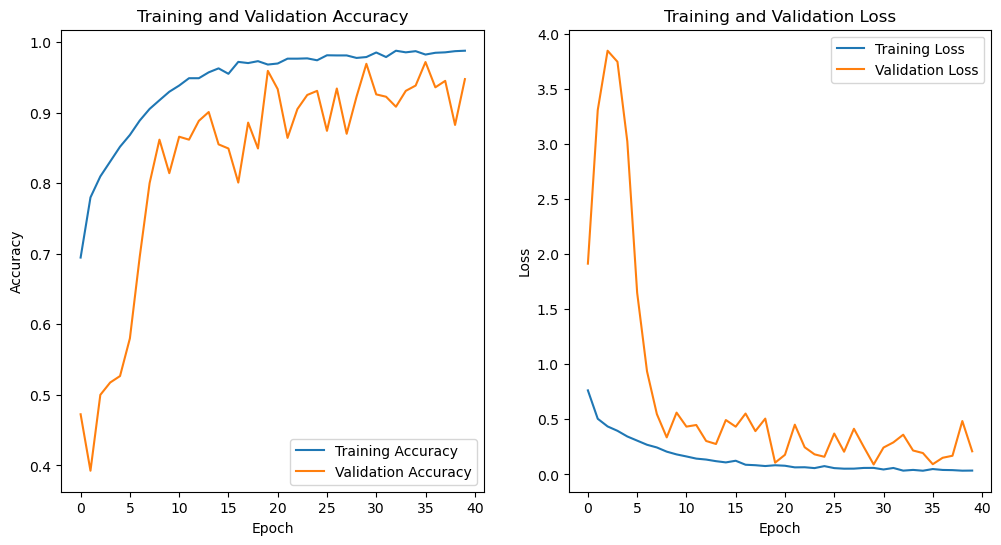

In [81]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [82]:
# 모델 평가
loss, accuracy = model.evaluate(val_x, val_y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

38/38 [==============================] - 5s 114ms/step - loss: 0.2101 - accuracy: 0.9475
Loss: 0.21005438268184662, Accuracy: 0.9474999904632568


In [70]:
pred_y=model.predict(val_x)
predicted_classes = np.argmax(pred_y, axis=1)
predicted_classes

38/38 [==============================] - 4s 92ms/step


array([0, 2, 1, ..., 0, 1, 1], dtype=int64)

In [83]:
# 이미지 불러오기, 사진수에 맞게 for문 범위 수정
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_size = (128, 128)

test_images = []
for i in range(1, 6001):
    try:
        img = load_img(f"C:/Users/user/Desktop/kevin1/{i}.jpg", target_size=target_size)
        image_arr = img_to_array(img)
        test_images.append(image_arr)
    except FileNotFoundError:
        print(f"파일 {i}.png를 찾을 수 없습니다.")

In [84]:
#  정규화 수행
test_x = np.array(test_images) / 255.0

In [85]:
labela = np.repeat(np.array([0]), 2000)
labelb = np.repeat(np.array([1]), 2000)
labelc = np.repeat(np.array([2]), 2000)
# 두 배열을 수평으로 연결 (가로로 이어붙이기)
result = np.concatenate((labela, labelb, labelc), axis=0)  # axis=0이면 수직으로 이어붙임

In [86]:
result

array([0, 0, 0, ..., 2, 2, 2])

In [87]:
pred_y=model.predict(test_x)
predicted_classes = np.argmax(pred_y, axis=1)
predicted_classes

188/188 [==============================] - 23s 120ms/step


array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [43]:
import cv2
import tensorflow as tf
import numpy as npqq

def detect_and_classify_objects(frame, model, class_labels):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

   
    hsv_ranges = {
        "strawberry": ([0, 100, 100], [10, 255, 255]),  # 빨간색 범위
    }

    for object_type, (lower, upper) in hsv_ranges.items():
        mask = cv2.inRange(hsv_frame, np.array(lower), np.array(upper))
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if cv2.contourArea(contour) > 500:  # 크기에 따라 필터링
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # 객체 분류
                object_frame = frame[y:y+h, x:x+w]
                resized_frame = cv2.resize(object_frame, (128, 128))
                preprocessed_frame = resized_frame / 255.0
                predictions = model.predict(np.expand_dims(preprocessed_frame, axis=0))
                predicted_class = np.argmax(predictions, axis=1)[0]
                label = class_labels[predicted_class]
                cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return frame

# TensorFlow 모델 및 클래스 라벨 로드
model = tf.keras.models.load_model('cnn_model.h5')
class_labels = {
    0: 'strawberry_healthy', 1: 'strawberry_Graymold', 2: 'strawberry_Anthracnose',
}
# 카메라 설정
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Camera is not accessible.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 객체 탐지 및 분류
    frame = detect_and_classify_objects(frame, model, class_labels)

    # 결과 화면에 표시
    cv2.imshow('Strawberry', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 객체 확률표시하는 경우

In [2]:
import cv2
import tensorflow as tf
import numpy as np

def detect_and_classify_objects(frame, model, class_labels):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
   
    hsv_ranges = {
        "strawberry": ([0, 100, 100], [10, 255, 255]),  # 빨간색 범위
    }

    for object_type, (lower, upper) in hsv_ranges.items():
        mask = cv2.inRange(hsv_frame, np.array(lower), np.array(upper))
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if cv2.contourArea(contour) > 500:  # 크기에 따라 필터링
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # 객체 분류
                object_frame = frame[y:y+h, x:x+w]
                resized_frame = cv2.resize(object_frame, (128, 128))
                preprocessed_frame = resized_frame / 255.0
                predictions = model.predict(np.expand_dims(preprocessed_frame, axis=0))
                predicted_class = np.argmax(predictions, axis=1)[0]
                label = class_labels[predicted_class]
                probability = np.max(predictions) * 100  # 예측 확률

                # 라벨과 예측 확률을 화면에 표시
                cv2.putText(frame, f'{label} ({probability:.2f}%)', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return frame

# TensorFlow 모델 및 클래스 라벨 로드
model = tf.keras.models.load_model('cnn_model.h5')
class_labels = {
    0: 'strawberry_healthy', 1: 'strawberry_Graymold', 2: 'strawberry_Anthracnose',
}

# 카메라 설정
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Camera is not accessible.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 객체 탐지 및 분류
    frame = detect_and_classify_objects(frame, model, class_labels)

    # 결과 화면에 표시
    cv2.imshow('Strawberry Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 60ms/step


NameError: name 'model' is not defined